# Linear Regression

Simple (one feature):
$$ \hat{y} = \theta_0 + \theta_1 x $$

Multiple linear regression (p features):
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_n $$

Vectorized form:
$$ \hat{y} = \mathbf{\Theta} \cdot \mathbf{x} $$

Mean Squared Error (MSE):
$$
\text{MSE} = \frac{1}{m}\sum_{i=1}^{m}\big(\mathbf{\Theta}^{\top}\mathbf{x}^{(i)} - y^{(i)}\big)^2
$$

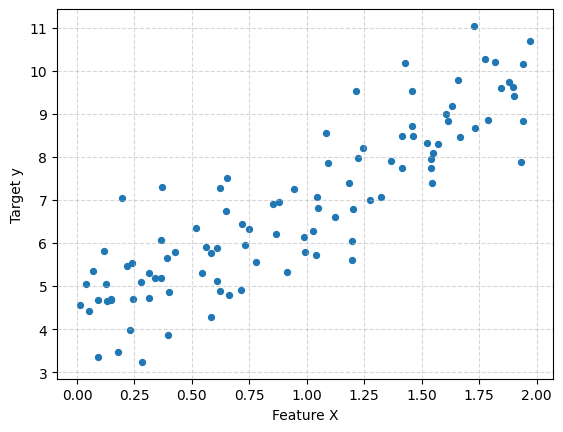

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

m = 100  # number of samples
X = 2 * np.random.rand(m, 1)  # feature matrix
y = 4 + 3 * X + np.random.randn(m, 1)  # target values with noise

plt.scatter(X, y, s=18)  # slightly smaller points
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Normal equation

Computational complexity is $\mathcal{O}(n^3)$.

In [13]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print("Predictions:\n", y_predict)

Predictions:
 [[4.21509616]
 [9.75532293]]


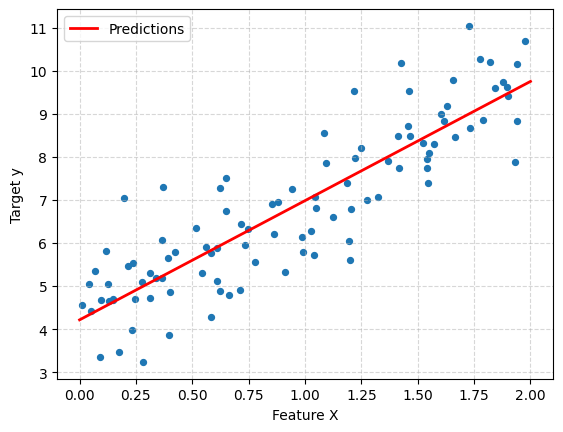

In [7]:
plt.scatter(X, y, s=18)  # slightly smaller points
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Using Scikit-Learn

Computational complexity is $\mathcal{O}(n^2)$.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_predict_sklearn = model.predict(X_new)
print("Predictions using Scikit-Learn:\n", y_predict_sklearn)


Predictions using Scikit-Learn:
 [[4.21509616]
 [9.75532293]]


## Gradient Descent

random initialization -> small steps in direction of descending gradient of the error function -> _converges_ to a minimum  
**learning rate** - size of the steps
- too small - will take long time
- too big - will diverge from minimum  

**number of epochs** - number of steps  
can be fixed, or just very high and work until gradient is smaller than **tollerance** $\epsilon$

MSE for linear model is a **convex function** - guaranteed to reach global minimum  
Important for all features to have **similar scale** (to converge faster)

## Batch Gradient Descent
Uses the **whole training data at every step**  
Very slow on large training sets, but still faster than Normal equation or SVD decomposition.
$$
\nabla_\mathbf{\Theta}\text{MSE}(\mathbf{\Theta}) = \frac{2}{m}\mathbf{X}^{\top}(\mathbf{X}\mathbf{\Theta} - \mathbf{y})  
$$
$$
\mathbf{\Theta}^\text{(next step)} = \mathbf{\Theta} - \eta\nabla_\mathbf{\Theta}\text{MSE}(\mathbf{\Theta})
$$